<a href="https://colab.research.google.com/github/albertomendess/Data-Science/blob/main/Criando_Agrupamentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Relatório de Análise VII

In [44]:
import pandas as pd

In [45]:
dados = pd.read_csv('/content/aluguel.csv', sep= ';')
dados.head(7)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
1,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
5,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento
6,Apartamento,Freguesia (Jacarepaguá),3,0,0,54,950.0,300.0,28.0,17.59,Apartamento


In [46]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon',
           'Botafogo', 'Flamengo', 'Tijuca']

selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]

In [47]:
dados['Bairro'].drop_duplicates()

5           Copacabana
7      Barra da Tijuca
8               Tijuca
11             Ipanema
14            Botafogo
17              Leblon
105           Flamengo
Name: Bairro, dtype: object

In [48]:
grupo_bairro = dados.groupby('Bairro')
type(grupo_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [49]:
for bairro, data in grupo_bairro:
    print('{} -> {}'.format(bairro, data.Valor.mean()))

Barra da Tijuca -> 5500.497783032811
Botafogo -> 3375.4605418138985
Copacabana -> 3351.519427402863
Flamengo -> 3220.119266055046
Ipanema -> 5451.549307253464
Leblon -> 5661.45393258427
Tijuca -> 1999.9380127620784


In [50]:
grupo_bairro['Valor'].mean().round(2)

Bairro
Barra da Tijuca    5500.50
Botafogo           3375.46
Copacabana         3351.52
Flamengo           3220.12
Ipanema            5451.55
Leblon             5661.45
Tijuca             1999.94
Name: Valor, dtype: float64

# Estatíscas Descritivas

In [53]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3383.0,5500.50,5123.02,800.0,2400.0,3700.0,6700.0,32000.0
Botafogo,849.0,3375.46,2015.90,700.0,2200.0,3000.0,4250.0,22000.0
Copacabana,2445.0,3351.52,1904.58,100.0,1915.0,2900.0,4200.0,9900.0
Flamengo,654.0,3220.12,1958.30,800.0,1800.0,2700.0,4000.0,9500.0
Ipanema,1227.0,5451.55,2093.76,1200.0,3759.0,5500.0,7000.0,9900.0
Leblon,890.0,5661.45,2746.71,100.0,3900.0,5000.0,7000.0,30000.0
Tijuca,1097.0,1999.94,1039.67,750.0,1500.0,1800.0,2300.0,19000.0


In [56]:
grupo_bairro['Valor'].aggregate(['min', 'max']).rename(columns = {'min': 'Minimo', 'max': 'Maximo'})

,Minimo,Maximo
Bairro,,
Barra da Tijuca,800.0,32000.0
Botafogo,700.0,22000.0
Copacabana,100.0,9900.0
Flamengo,800.0,9500.0
Ipanema,1200.0,9900.0
Leblon,100.0,30000.0
Tijuca,750.0,19000.0


In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize= (20, 10))

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

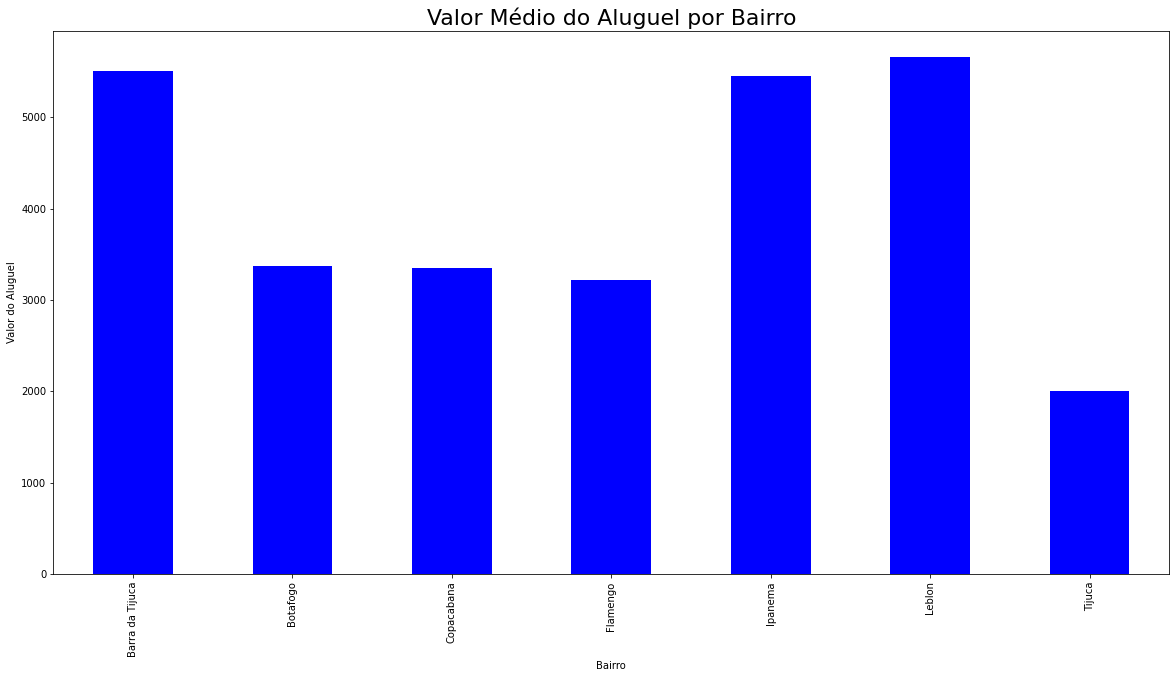

In [60]:
fig = grupo_bairro['Valor'].mean().plot.bar(color= 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize': 22})